In [1]:
cd ..

/Users/clementmarie/ML/SORBONNE/PROJET_IN013


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [14]:
df_stopwords = pd.read_csv('data/files/data_preprocess_avec_stopwords.csv')
df_wo_stopwords = pd.read_csv('data/files/data_preprocess_sans_stopwords.csv')

df_stopwords = df_stopwords.dropna(inplace=False)
df_wo_stopwords = df_wo_stopwords.dropna(inplace=False)

df_stopwords = df_stopwords.reset_index(drop=True)
df_wo_stopwords = df_wo_stopwords.reset_index(drop=True)

In [15]:
df_stopwords['positive'] = df_stopwords['note'] > 5.0
df_wo_stopwords['positive'] = df_wo_stopwords['note'] > 5.0

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_wo_stopwords['comment'], df_wo_stopwords['positive'])

In [17]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [18]:
X_train

0         product coherent temp public sendort tout regl...
1         jeu mem extraordinair mauv combatt heros diffe...
2         revoi critiqu apre plusieur partiesed temp ape...
3         a lannonc sort nouveau jeu createur loup garou...
4         chouet matos tre agreabl manipulertr bien bala...
                                ...                        
140221    materiel superb tuil petit montagn tout mim ca...
140222    tout comm film pourrion avoir certain reticent...
140223    system soi nest deplais sil nav gros defaut ci...
140224    crab cassetet extrem facil bien jol collection...
140225    beau pet jeu them tre apprec pet moussaillon d...
Name: comment, Length: 140226, dtype: object

## Naive bayes

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

In [20]:
cv = CountVectorizer()
X_train_vect = cv.fit_transform(X_train)
y_train_vect = y_train

In [21]:
from sklearn.naive_bayes import MultinomialNB

In [22]:
nb = MultinomialNB()

In [28]:
nb.fit(X_train_vect, y_train_vect)

MultinomialNB()

In [31]:
X_test_vect = cv.transform(X_test)
y_test_vect = y_test

In [55]:
y_test_predict = nb.predict(X_test_vect)
accuracy_score(y_test, y_test_predict)

0.8819477129776219

## Cross val

In [33]:
from sklearn.model_selection import cross_val_score

In [36]:
scores = cross_val_score(nb, X_train_vect, y_train, cv=10)

In [38]:
scores.mean()

0.8686619531966215

## Learning curves

In [40]:
nb_curves = MultinomialNB()

In [74]:
def plot_learning_curves(model, X_train, X_test, y_train, y_test):
    train_errors, val_errors = [], []
    for m in range(1, X_train.shape[0], 1000):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(accuracy_score(y_train[:m], y_train_predict))
        val_errors.append(accuracy_score(y_test, y_test_predict))
        
    plt.plot(np.sqrt(train_errors[5:]), 'r-+', label='train')
    plt.plot(np.sqrt(val_errors[5:]), 'b-', label='val')
    plt.xlabel("Training set size", fontsize=12)
    plt.ylabel("accuracy", fontsize=12)
    plt.legend()

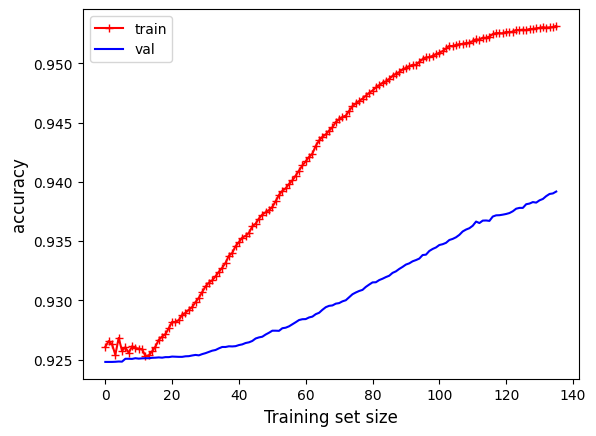

In [75]:
plot_learning_curves(nb_curves, X_train_vect, X_test_vect, y_train, y_test)

#### the training and testing accuracy increase with the training size so adding more data is relevant. starting from 140k rows, the training accuracy starts to plateau so it's probably the best fit we can do. 

## IGNORER ->

In [28]:

def naive_bayes_train(X, y): 
    
    cv = CountVectorizer(max_features=30000)
    X_train_array = cv.fit_transform(X)
    X_train_array = X_train_array.toarray()
    
    vocab = cv.get_feature_names_out().tolist()
    parameters_hate = {word:0 for word in vocab}
    parameters_nonhate = {word:0 for word in vocab}
    
    p_pos, p_neg = y_train.value_counts(normalize=True)[0], y_train.value_counts(normalize=True)[1]
    alpha = 1
    
    n_pos = X_train.loc[y_train == 1].apply(len).sum()
    n_neg = X_train.loc[y_train == 0].apply(len).sum()
    n_vocab = len(vocab)
    
    parameters_pos = {word:0 for word in vocab}
    parameters_neg = {word:0 for word in vocab}
    
    for word in tqdm(vocab):
        n_word_given_pos = vocab_counts.loc[y_train == True, word].sum()
        n_word_given_neg = vocab_counts.loc[y_train == False, word].sum()
        
        parameters_pos[word] = (n_word_given_pos + alpha) / (n_pos + alpha * n_vocab)
        parameters_neg[word] = (n_word_given_neg + alpha) / (n_neg + alpha * n_vocab)
        
    return p_pos, p_neg, parameters_pos, parameters_neg

In [29]:
naive_bayes_train(X_train[:1000], y_train[:1000])

  0%|                                                  | 0/8841 [00:00<?, ?it/s]


NameError: name 'vocab_counts' is not defined